# iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris() # 분꽃
iris.target_names # 3종류의 분꽃 분류하기
iris.feature_names # features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
X=iris.data # input data # the number of input nodes = 4
y=iris.target

In [3]:
import torch
from sklearn.model_selection import train_test_split

#y=torch.nn.functional.one_hot(yt)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

# array -> tensor
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)  
y_test = torch.LongTensor(y_test)

In [4]:
# model
din, dh, dout = 4,20,3
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh), # input - hidden
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)

# loss and optimizer
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [6]:
# learning
for epoch in range(10000):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    optimizer.zero_grad() # zero_grad(): 미분값 초기화
    loss.backward() # backpropagation
    optimizer.step() # update weights and biases
    if(epoch%1000==0):
        print(epoch, loss.item())

0 1.0928705930709839
1000 0.5633963942527771
2000 0.5604259371757507
3000 0.5599745512008667
4000 0.5598577260971069
5000 0.5598152875900269
6000 0.5597967505455017
7000 0.559787929058075
8000 0.5597833395004272
9000 0.559781014919281


In [8]:
prediction = y_pred.max(1)[1] # max indices
prediction

tensor([2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2,
        0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1,
        2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0,
        1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1,
        2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2])

In [9]:
y_train

tensor([2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2,
        0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1,
        2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0,
        1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1,
        2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2])

In [13]:
sum(prediction-y_train)

tensor(1)

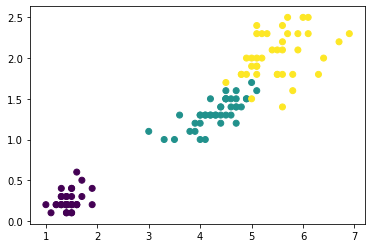

In [112]:
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)

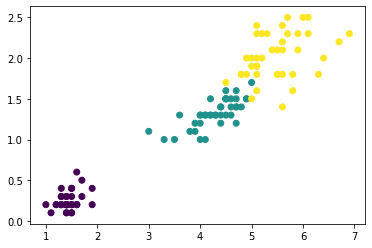

In [113]:
plt.scatter(X_train[:,2],X_train[:,3],c=prediction)